# Quadratic sorts

This file demonstrates data on the performance of various quadratic sorts. The following algorithms were tested:
- Bubble Sort
- Selection Sort
- Insertion Sort

## Testing methods

- Each algorithm was tested on random data with sample size ranging from $10^4$ to $10^6$, with the step size of $10^4$.
- All tests which took less than 2 minutes to complete were repeated 5 times and the average time of 5 tests was taken as a result.
- Due to the long time each test took to complete, the tests for different algorithms were split into separate test sessions. As a result, algorithms were tested on different test data sets. However, due to randomness of tests and the fact that slower-running tests were repeated, we can assume, that tests were fairly distributed.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
csv_files = ["results/bubble_sort.csv", "results/insertion_sort.csv", "results/selection_sort.csv"]
df = pd.concat((pd.read_csv(f) for f in csv_files), ignore_index=True)
# df = pd.read_csv("results/quadratic_sorts.csv")
df = df.pivot(index="Sample Size", columns="Algorithm", values="Elapsed Time (ms)")
print(df.head(3))

Algorithm    Bubble  Insertion  Selection
Sample Size                              
10000           230          8         47
20000           894         39        181
30000          2027         86        405


## All three sorts comparison

Here are the plots (in linear and logarithmic scales) of the recorded performance of all three sorting algorithms:

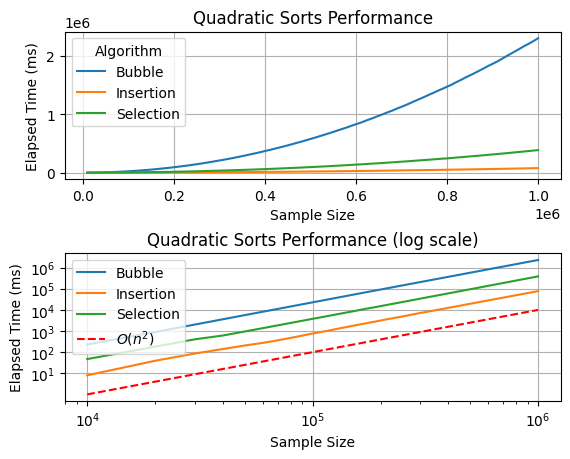

In [16]:
figure, axes = plt.subplots(nrows=2, ncols=1)
linear_scale, log_scale = axes
figure.subplots_adjust(hspace=0.5)
df.plot(
        ax=linear_scale,
        ylabel="Elapsed Time (ms)",
        title="Quadratic Sorts Performance",
        grid=True)
df[df.values > 0].plot(
        ax=log_scale,
        loglog=True,
        ylabel="Elapsed Time (ms)",
        title="Quadratic Sorts Performance (log scale)",
        legend=False,
        yticks=np.logspace(1, 7, 7, base=10),
        grid=True)
x = np.logspace(4, 6, 10, base=10)
log_scale.plot(x, (x/10000)**2, '--r', label='$O(n^2)$')
log_scale.legend()

Logarithmic scale plot confirms that all three sorting algorithms have the same time complexity $O(n^2)$

Both plots indicate that the bubble sort algorithm is performing much worse than the insertion and selection sort algorithms. Logarithmic scale plot allows us to estimate that bubble sort is about 8 times slower than selection sort and about 30 times slower than insertion sort, while selection sort is about 4 times slower than insertion sort.

## Conclusions

The results show, that while all three algorithms have the same time complexity, the bubble sort performs more comparisons and swaps, which causes it to be considerably slower than the other two algorithms.

While selection and insertion sorts both perform $O(n)$ swaps, the selection sort performs around $\frac{n^2}{2}$ comparisons, while $\frac{n^2}{4}$ worst-case comparisons suffice for the insertion sort. Moreover, the data shows, that on random data insertion sort performed around $\frac{n^2}{8}$ comparisons, making it 4 times faster than the selection sort algorithm.